# 手写数字识别kears版本

In [1]:
import tensorflow as tf
import tensorflow.keras as kears
import tensorflow.keras.datasets.mnist as mnist
import tensorflow.keras.layers as layers

#加载数据集
(data_train, label_train), (data_test, label_test) = mnist.load_data()

# print(data_train.shape, label_train.shape)   # 训练样本集
# print(data_test.shape, label_test.shape)   # 测试样本集

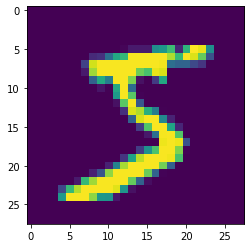

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(data_train[0])
plt.show()

In [3]:
data_train=data_train.reshape(60000,784)
data_test=data_test.reshape(10000,784)
print(data_train.shape)

(60000, 784)


In [4]:
#归一化，使原来0到255的值变到0到1之间
data_train=data_train/255
data_test=data_test/255

In [5]:
#将labels处理成one-hot
print(label_train[0])
label_train=kears.utils.to_categorical(label_train,10)
print(label_train[0])
label_test=kears.utils.to_categorical(label_test,10)
print(label_test[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [7]:
#数据处理完毕，开始构建神经网络
model=kears.Sequential()
model.add(layers.Dense(512,activation="relu",input_shape=(784,)))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

In [8]:
#查看模型结构
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
#print(label_test[0])
#print(label_train[0])
model.fit(x=data_train,y=label_train,batch_size=100,epochs=20,validation_data=(data_test,label_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2158 - acc: 0.9351 - val_loss: 0.1001 - val_acc: 0.9699
Epoch 2/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0802 - acc: 0.9756 - val_loss: 0.0755 - val_acc: 0.9761
Epoch 3/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0512 - acc: 0.9834 - val_loss: 0.0734 - val_acc: 0.9771
Epoch 4/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0380 - acc: 0.9877 - val_loss: 0.0648 - val_acc: 0.9802
Epoch 5/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0235 - acc: 0.9923 - val_loss: 0.0695 - val_acc: 0.9804
Epoch 6/20
60000/60000 [==============================] - 4s 58us/sample - loss: 0.0245 - acc: 0.9919 - val_loss: 0.0903 - val_acc: 0.9758
Epoch 7/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0175 - acc: 0.9939 - val_loss: 0.

# Tensorboard版本

In [ ]:
import tensorflow  as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.tensorboard.plugins import projector

#载入数据集
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
#运行次数
max_steps = 50
#图片数量
image_num = 3000
#文件路径
DIR = "F:/jupyter_notebook/tensorflow_test"

#定乂会活
sess = tf.Session()
#载入囹片
embedding = tf.Variable(tf.stack(mnist.test.images[:image_num]),trainable=False,name='embedding' )

#参数概要
def variable_summaries(var):
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar( 'mean',mean) #平均値
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        tf.summary.scalar('stddev',stddev) #标准差
        tf.summary.scalar('max',tf.reduce_max(var))#最大値
        tf.summary.scalar('min', tf.reduce_min(var)) #最小値
        tf.summary.histogram('histogram',var) #直方图


#命名空间
with tf.name_scope('input'):
    #这里的none表示第一个维度可以是任意的长度
    x = tf.placeholder(tf.float32,[None, 784],name='x-input')
    #正确的标签
    y = tf.placeholder(tf.float32,[None, 10],name='y-input')

#显示图片
with tf.name_scope('input.reshape'):
    image_shaped_input = tf.reshape(x,[-1,28,28,1])
    tf.summary.image('input',image_shaped_input,10)

with tf.name_scope('layer'):
    #创建一一个简单神经网络
    with tf.name_scope('weights'):
        W = tf.Variable(tf.zeros([784,10]),name='W')
        variable_summaries (W)

    with tf.name_scope('biases'):
        b = tf.Variable(tf.zeros([10]),name='b' )
        variable_summaries (b)
    with tf.name_scope('wx_plus_b') :
        wx_plus_b = tf.matmul(x,W) + b
    with tf.name_scope('softmax'):
        prediction = tf.nn.softmax(wx_plus_b)

with tf.name_scope('loss'):
    #交叉熵代价函数
    loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=prediction))
    tf.summary.scalar('1oss',loss)
with tf.name_scope('train'):
    train_step=tf.train.AdamOptimizer(0.001).minimize(loss)

#初始化变量
sess.run(tf.global_variables_initializer())

with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction') :
        #结果存放在一个布尔型列表中
        correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))#argmax返回-维张量中最大的值所在的位置
    with tf.name_scope('accuracy'):
        #求准确率
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32)) #把correct_prediction变为float32类型
        tf.summary.scalar('accuracy',accuracy)

#产生metadata文件
if tf.gfile.Exists(DIR + '/projector/projector/metadata.tsv'):
    tf.gfile.DeleteRecursively(DIR +'/projector/projector/metadata.tsv')
with open(DIR+'/projector/projector/metadata.tsv','w') as f:
    labels=sess.run(tf.argmax(mnist.test.labels[:],1))
    for i in range(image_num):
        f.write(str(labels[i])+'\n')

#合并所有的summary
merged = tf.summary.merge_all()

projector_writer =tf.summary.FileWriter(DIR +'/projector/projector',sess.graph)
saver = tf.train.Saver()
config = projector.ProjectorConfig()
embed = config.embeddings.add()
embed.tensor_name = embedding.name
embed.metadata_path = DIR +'/projector/projector/metadata.tsv'
embed.sprite.image_path = DIR +'projector/data/mnist_10k_sprite.png'
embed.sprite.single_image_dim.extend([28, 28])
projector.visualize_embeddings(projector_writer,config)


for i in range (max_steps):
    #每个批次100个样本
    batch_xs,batch_ys = mnist.train.next_batch(100)
    run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
    run_metadata = tf.RunMetadata()
    summary,_=sess.run([merged,train_step],feed_dict={x:batch_xs,y:batch_ys},options=run_options,run_metadata=run_metadata)
    projector_writer.add_run_metadata(run_metadata,'step%03d' % i)
    projector_writer.add_summary(summary,i)

    if i%5 == 0:
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print ("Iter " + str(i) +" , Testing Accuracy= " + str (acc))

saver.save(sess,DIR +'/projector/projector/a_model.ckpt',global_step=max_steps)
projector_writer.close()
sess.close()